In [2]:
import os
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np



In [2]:
img = np.ones((201, 201), dtype=np.int) * 255
c = (100, 100)
print(img.shape)

# img = np.array([
#     [1,150,3,4,5],
#     [5,4,3,200,1]
# ])

(201, 201)


(201, 201, 1)
(201, 201, 3)
0


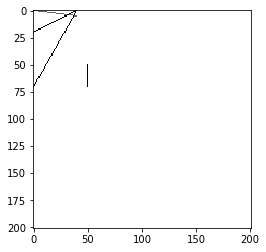

In [10]:
tmp = np.expand_dims(img, axis=2) 
print(tmp.shape)
imgOfThree = np.concatenate((tmp, tmp, tmp), axis=-1)
print(imgOfThree.shape)
plt.imshow(imgOfThree, cmap='gray')
print(np.min(imgOfThree))
plt.show()

In [4]:
'''     
         x
  -------------------------->
  |
  |
 y|
  |
  |
  |
  \/
'''

'     \n         x\n  -------------------------->\n  |\n  |\n y|\n  |\n  |\n  |\n  \\/\n'

In [5]:
# p1 = (y1, x1), p2 = (y2, x2)
# flag
def draw_line(canvas, p1, p2, color, flag = False):
    if p1[1] > p2[1]:
        p1, p2 = p2, p1
    dy = p2[0] - p1[0]
    dx = p2[1] - p1[1]
    x = int(p1[1])
    y = int(p1[0])
    if dx != 0:
        k = dy / dx
        if k >= 0:
            if k <= 1: # x是长边
                canvas[y, x] = color
                e = dx * -1
                while x < p2[1]:
                    e = e + 2 * dy
                    x = x + 1
                    if e > 0:
                        y = y + 1
                        e = e - 2 * dx
                    else:
                        pass
                        # y = y
                    if flag:
                        # print('\n')
                        # print(p1, p2)
                        # print(p2[1])
                        canvas[y, int(x - 2 * (x - p1[1]))] = color

                    else:
                        canvas[y, x] = color
            else: # y是长边
                canvas[y, x] = color
                e = dy * -1
                while y < p2[0]:
                    e = e + 2 * dx
                    y = y + 1
                    if e > 0:
                        x = x + 1
                        e = e - 2 * dy
                    else:
                        pass
                        # y = y
                    if flag:
                        # print(x)
                        canvas[y, int(x - 2 * (x - p1[1]))] = color
                        # if int(x - p1[1]) < 0:
                        #     print(p1, p2, flag)
                    else:
                        canvas[y, x] = color
        else:
            draw_line(canvas, (y, x + 2 * dx), p2, color, True)
    else: # 垂直x 轴的直线
        step = 1
        if dy < 0:
            step = -1
        
        for i in range(p1[0], p2[0] + step, step):
            canvas[i, p1[1]] = color


In [51]:
# verticial line
draw_line(img,(70, 50),(50, 50), 0)

In [7]:
draw_line(img, (0, 0), (5, 40), 100)

In [8]:
draw_line(img, (20, 0), (0, 40), 0)

In [9]:
draw_line(img, (70, 0), (0, 40), 0)

In [92]:
rotate_matrix = np.array([[np.cos(2 * np.pi / 360), -1 * np.sin(2 * np.pi / 360)],
                          [np.sin(2 * np.pi / 360), np.cos(2 * np.pi / 360)]])

In [82]:
rotate_matrix

array([[ 0.9998477 , -0.01745241],
       [ 0.01745241,  0.9998477 ]])

In [11]:
c  = (42, 42)
to = (84, 42)
dx = 0
dy = 0
for i in range(360):
    draw_line(img, c, (int(c[0] + dx), int(c[1] + dy)), 0)
    dx = np.sin(2 * np.pi / 360 * i) * 42
    dy = np.cos(2 * np.pi / 360 * i) * 42

    # to = np.matmul(to, rotate_matrix.T)
    # print(to)

In [12]:
np.array((3,3))

array([3, 3])

In [3]:
def draw_line_acc(canvas, p1, p2, color, flag = False):
    if p1[1] > p2[1]:
        p1, p2 = p2, p1
    dy = p2[0] - p1[0]
    dx = p2[1] - p1[1]
    x = int(p1[1])
    y = int(p1[0])
    if dx != 0:
        k = dy / dx
        if k >= 0:
            if k <= 1: # x是长边
                canvas[y, x] += color
                e = dx * -1
                while x < p2[1]:
                    e = e + 2 * dy
                    x = x + 1
                    if e > 0:
                        y = y + 1
                        e = e - 2 * dx
                    else:
                        pass
                        # y = y
                    if flag:
                        # print('\n')
                        # print(p1, p2)
                        # print(p2[1])
                        canvas[y, int(x - 2 * (x - p1[1]))] += color

                    else:
                        canvas[y, x] += color
            else: # y是长边
                canvas[y, x] += color
                e = dy * -1
                while y < p2[0]:
                    e = e + 2 * dx
                    y = y + 1
                    if e > 0:
                        x = x + 1
                        e = e - 2 * dy
                    else:
                        pass
                        # y = y
                    if flag:
                        # print(x)
                        canvas[y, int(x - 2 * (x - p1[1]))] += color
                        # if int(x - p1[1]) < 0:
                        #     print(p1, p2, flag)
                    else:
                        canvas[y, x] += color
        else:
            draw_line_acc(canvas, (y, x + 2 * dx), p2, color, True)
    else: # 垂直x 轴的直线
        step = 1
        if dy < 0:
            step = -1
        
        for i in range(p1[0], p2[0] + step, step):
            canvas[i, p1[1]] += color

In [4]:
c  = (100, 100)
r = 100
dx = 0
dy = 0



for i in range(360):
    draw_line_acc(img, c, (int(c[0] + dx), int(c[1] + dy)), -0.2)
    dx = round(np.sin(2*np.pi / 360 * i) * r)
    dx = min(dx, r)
    dy = round(np.cos(2*np.pi / 360 * i) * r)
    dy = min(dy, r)


NameError: name 'img' is not defined

In [8]:
img = np.ones((201, 201))

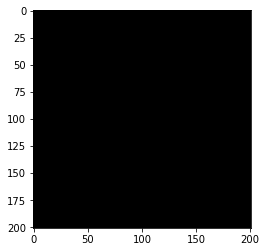

1.0 1.0


In [9]:
plt.imshow(img, cmap = plt.get_cmap('gray'))
plt.show()
print(np.max(img), np.min(img))

In [6]:
c  = (100, 100)
r = 100
num = 180
robs = []
for i in range(num):

    dx = round(np.sin(2*np.pi / num * i) * r)
    dx = min(dx, r)
    dy = round(np.cos(2*np.pi / num * i) * r)
    dy = min(dy, r)
    robs.append([c[0] + dy, c[1] + dx])

In [7]:
for p in robs:
    img[p[0], p[1]] = 1

# read image

In [11]:
r = 100
img_o = Image.open('origin2.jpg')
img_o = img_o.resize((2*r+1, 2*r+1), Image.ANTIALIAS)

img_o = np.array(img_o)

def rgb2gray(rgb):
    return np.dot(rgb[...,:3], [0.299, 0.587, 0.114])

img_o = rgb2gray(img_o) / 255

In [12]:
img_o.shape

(201, 201)

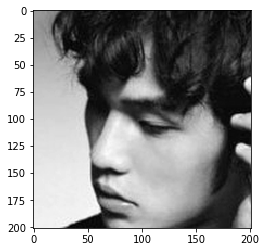

In [13]:
plt.imshow(img_o, cmap = plt.get_cmap('gray'))

In [14]:
def distance(object, canvas):
    return np.sqrt(np.sum(np.square(object.flatten() - canvas.flatten())))

In [15]:
def find_one_with(object, canvas, p1):
    ans = ((0,0), (0,0))
    minimum = np.inf
    for p2 in robs:
        if(p1 == p2):
            continue
        tmp = canvas.copy()
        draw_line_acc(tmp, p1, p2, -0.2)
        dis = distance(object, tmp)
        if dis < minimum:
            minimum = dis
            ans = (p1, p2)
    
    return ans

499


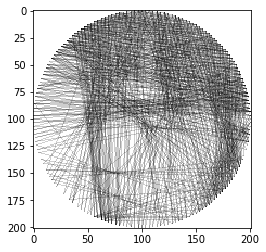

1.0 -1.7999999999999998
999


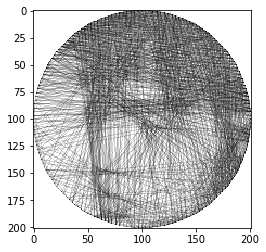

1.0 -3.0000000000000004
1499


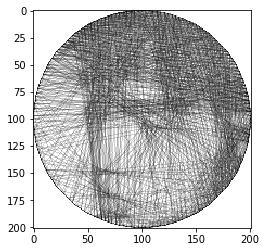

1.0 -4.200000000000001
1999


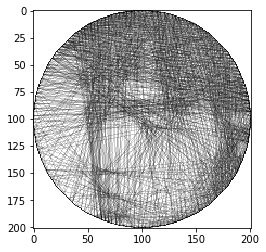

1.0 -5.400000000000002
2499


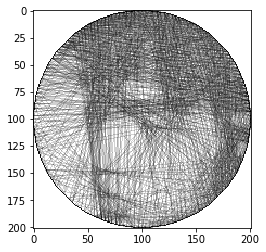

1.0 -6.600000000000003
2999


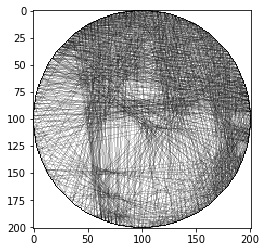

1.0 -7.800000000000004
3499


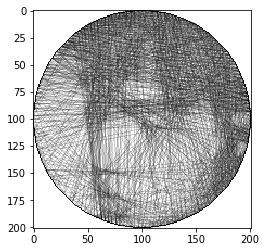

1.0 -8.600000000000001
3999


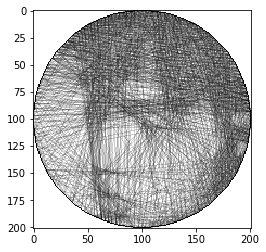

1.0 -10.199999999999996
4499


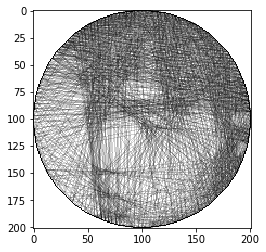

1.0 -11.399999999999991
4999


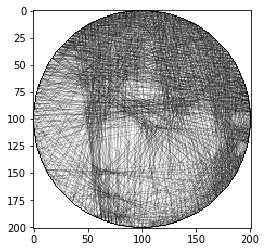

1.0 -13.799999999999983


In [16]:
pre = robs[0]
sequences = []
for i in range(5000):
    sequences.append(pre)
    p1, p2 = find_one_with(img_o, img, pre)
    draw_line_acc(img, p1, p2, -0.2)
    pre = p2
    # print(p1, p2)
    if (i + 1) % 500 == 0:
        print(i)
        tmp = img.copy()
        a = np.exp(tmp)
        b = np.exp(tmp) / np.sum(a)

        plt.imshow(b, cmap = plt.get_cmap('gray'))
        plt.show()
        print(np.max(img), np.min(img))



In [121]:
tmp = img

In [122]:
a = np.exp(tmp)

In [123]:
np.sum(a)

71345.06878423199

In [124]:
b = np.exp(tmp) / np.sum(a)

In [125]:
b.shape

(201, 201)

In [1]:
plt.imshow(b, cmap = plt.get_cmap('gray'))
plt.show()

NameError: name 'plt' is not defined

In [104]:
tmp = tmp / (np.max(tmp) - np.min(tmp))

In [129]:
sequences = np.array(sequences)

In [130]:
sequences.shape

(5000, 2)

In [131]:
np.save('sequences', sequences)

In [141]:
c = np.load('sequences.npy')

In [140]:
c[1]

[6, 134]